In [3]:
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lib import make_line

palette = ['#386DF9', '#FFDC52', '#FF1614', '#62F591', '#AA22FF', '#34495E']
sns.set(font_scale=1.1, style='darkgrid', palette=palette, context='notebook')

In [4]:
df = pd.read_csv('../data/classification.csv')

df.head()

,Age,Time on site,Purchased
0,39.945219,90.718666,0.0
1,37.840693,88.991427,0.0
2,20.504708,110.649832,1.0
3,40.428057,89.728993,0.0
4,40.800617,88.735481,0.0


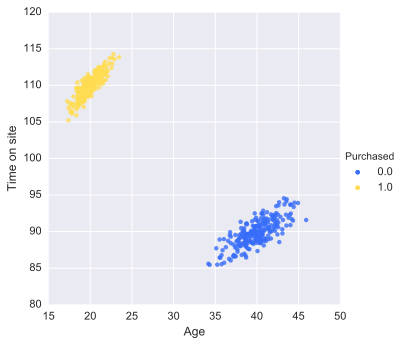

In [5]:
sns.lmplot('Age', 'Time on site', data=df, fit_reg=False, hue='Purchased')

In [6]:
# we will use scikit-learn's LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split

# (set random state for the purposes of demonstration)
train, test = train_test_split(df, train_size=0.7, random_state=1000)
X_train = train[['Age', 'Time on site']]
y_train = train['Purchased']

X_test = test[['Age', 'Time on site']]
y_test = test['Purchased']

model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# what value's for m and b did we learn?
m = model.coef_[0]
b = model.intercept_

print('m', m)
print('b', b)

m [-0.53749216  0.13900697]
b [-0.00236176]


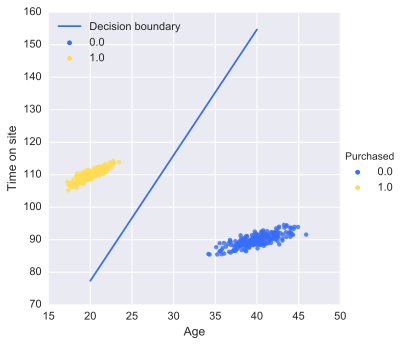

In [8]:
sns.lmplot('Age', 'Time on site', data=df, fit_reg=False, hue='Purchased')

# Solve for y = m_1x_1 + m_2x_2 + b, where y=0, so we can plot this in 2D
def func(x):
    return -(m[0]*x + b)/m[1]

xs = np.linspace(20, 40, 500)
ys = func(xs)
plt.plot(xs, ys, label='Decision boundary')
plt.legend(loc=2)

In [11]:
# what is the model actual giving us? probabilities
model.predict_proba(X_test)

array([[  8.85547629e-03,   9.91144524e-01],
       [  1.61686258e-02,   9.83831374e-01],
       [  9.99786460e-01,   2.13539681e-04],
       [  9.99807830e-01,   1.92169982e-04],
       [  9.99675833e-01,   3.24167245e-04],
       [  9.99922029e-01,   7.79711193e-05],
       [  6.62432758e-03,   9.93375672e-01],
       [  1.31733288e-02,   9.86826671e-01],
       [  9.99814894e-01,   1.85105722e-04],
       [  9.99949004e-01,   5.09961487e-05],
       [  9.99875166e-01,   1.24833541e-04],
       [  9.99958980e-01,   4.10201366e-05],
       [  9.99962940e-01,   3.70604531e-05],
       [  9.99332477e-01,   6.67523461e-04],
       [  1.07376336e-02,   9.89262366e-01],
       [  9.99554041e-01,   4.45958760e-04],
       [  1.49248371e-02,   9.85075163e-01],
       [  9.99983279e-01,   1.67208970e-05],
       [  9.99095825e-01,   9.04175256e-04],
       [  2.10606426e-02,   9.78939357e-01],
       [  7.09217461e-03,   9.92907825e-01],
       [  9.99882664e-01,   1.17336483e-04],
       [  

In [9]:
# although scikit-learn returns labels by default
y_pred = model.predict(X_test)
y_pred

array([ 1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,
        1.,  1.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,
        0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  0.,  0.,  0.,
        0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.,
        0.,  1.,  0.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  0.,  0.,
        1.,  0.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        1.,  0.,  1.,  1.,  0.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.])

### measuring wrongness

So how did we do? With regression problems, we used the mean squared error to quantify our success.

With classification, we have a different set of techniques. With classification, the two ways we can be wrong are:

- Saying the point belongs to class 1 when it doesn't (__false positive__). For example, saying an email is "spam" when it isn't.
- Saying the point doesn't belong to class 1 when it does (__false negative__). For example, saying an email is "not spam" when it is.

When we guess that a point belongs to class 1 and it does, we call that a __true positive__. When a point doesn't belong to class 1 and we correctly guess that, we call that a __true negative__.

We can view the true positives and negatives and the false positives and negatives together in what is called a __confusion matrix__.

In [13]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm

NameError: name 'y_pred' is not defined

Other common measurements include:

- __recall__ - what fraction of the true class 1 items were properly identified as such?
- __precision__ - what fraction of items identified as class 1 were truly class 1?

![](https://upload.wikimedia.org/wikipedia/commons/thumb/2/26/Precisionrecall.svg/330px-Precisionrecall.svg.png) (source: [Wikipedia](https://commons.wikimedia.org/wiki/File:Precisionrecall.svg))

In [12]:
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision, recall

NameError: name 'metrics' is not defined

The recommended way, however, is to use the __area under the (ROC) curve__ (AUC).

![](assets/roc.jpg) ([source](http://gim.unmc.edu/dxtests/roc3.htm))

The AUC plots the false positive rate against the true positive rate for your classifier.

If you make more classifier more lenient in what it classifies positively, _both_ the true positive and false positive rates will increase. A good classifier, however, will have a greater increase in true positives than in false positives.

For example, in the "excellent" curve above, you can see that the true positive rate shoots up quickly when the false positive rate increases only a little.

The "worthless" curve above represents an AUC score of 0.5, which is achieved if your classifier just makes random guesses.

An AUC score of 1.0 is perfect.

In [11]:
y_pred = model.predict(X_test)
metrics.roc_auc_score(y_pred, y_test)

1.0

### why not accuracy?

You may be wondering, why can't we just score our results by counting the number we correctly classified over the total number of datapoints?

That metric is called _accuracy_, and the reason it's not recommended is because if your dataset is _biased_ -- that is, one class is present more frequently than the other -- you might get a high accuracy simply due to chance.

$$
\text{accuracy} = \frac{\text{num correct}}{\text{num total}}
$$

For example, say I have a dataset of emails, 90% of which are labeled spam and 10% are labeled not spam.

I could build a classifier which just classifies _everything_ as spam, and it would have a 0.9 accuracy (which is pretty good!). But the classifier hasn't actually _learned_ anything, and it probably won't generalize well to new email datasets.
